In [1]:
from pandas import Series, DataFrame
import pandas as pd
import re

df = pd.read_csv('NYC_Restaurants.csv',dtype=unicode)

Q1 Create a unique name for each restaurant

Approach: added a new column that concatenated the DBA, BUILDING, STREET,
Columns with spaces in between

In [2]:
df['RESTAURANT']=df['DBA']+" "+df['BUILDING']+" "+df['STREET']+" "+df["ZIPCODE"]
print df['RESTAURANT'][:10]

0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


Q2 How many restaurants are included in the data?

Approach: created a unique restaurants dataframe and deleted all duplicates\
in the RESTAURANT column
used the len function to find the number of records in the uniqueResturants\
data frame

In [3]:
uniqueRestaurants = df.drop_duplicates(subset='RESTAURANT')
print "Number of restaurants:", len(uniqueRestaurants)

Number of restaurants: 10114


Q3 How many chains are there?

Approach: created a data frame with a value count of the 'DBA' column
used the unique restaurants dataframe so that repeat offenders wouldn't be
counted twice
created a mask for when the value count was greater than or equal to 2
applied the mask to the list of unique restaurants
found the length (len) of the new dataframe

In [4]:
#create dataframe with the count of each restaurant of a chain
numberOfEach = uniqueRestaurants['DBA'].value_counts()


#create a mask to find resturants with 2 or more locations (chains)
chainMask = (numberOfEach >= 2)
chains = numberOfEach[chainMask]

print "Number of chains:", len(chains)


Number of chains: 368


Q4 Plot a bar graph of the top 20 most popular chains?

Approach: take the chains data frame and create a bar plot of the 
top 20 chains, which would be the ones with highest value counts
import %pylab inline to show bar plot

Populating the interactive namespace from numpy and matplotlib
1666


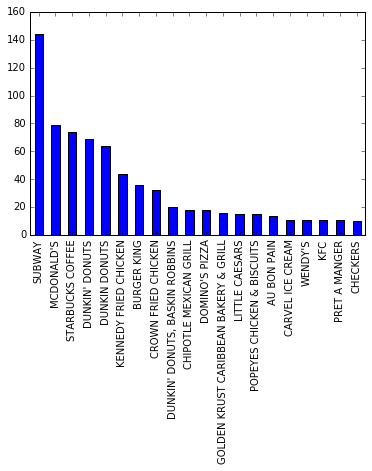

In [5]:
%pylab inline
top20_chains = chains[:20]
top20_chains.plot(kind='bar')
print sum(chains)

Q5 What fraction of all restaurants are chains?

Approach: we need the total number of restaurants and the total 
number of restaurant in chains  restaurants in chains / 
total number of restaurants

In [6]:
percentage_of_chains = float(sum(chains))/float(len(uniqueRestaurants))
print 'Fraction of restaurants that are chains '+ "%.2f" % float(percentage_of_chains *100) + "%"

Fraction of restaurants that are chains 16.47%


Q6 Plot all non-chain restaurants in each borrough

Approach: First we created a series that included only borroughs and unique restaurants,we derived this series from the unique restaurant dataframe from problem 2. Then I filtered out all the missing borrough values by dropping them. I then created a mask and applied it to the dataframe that we removed the missing values from. So at this point only non_chain restaurants should show. Once applied, the dataframe became a series, so i converted it back to a series so that it could be merged. Then i used value counts on the boroughs and plotted it 

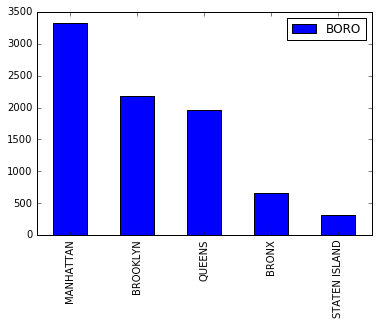

In [7]:
#building series of only borroughs and restaurants
rest_borrough = uniqueRestaurants[['DBA','BORO']]

#non chain mask
non_chainMask = (numberOfEach< 2)
non_chain = numberOfEach[non_chainMask]

non_chain_df = DataFrame(non_chain.index) #this creates a dataframe from the series that 
                                          #we applied the mask to, that way we can merge them
non_chain_df.columns = ['Restaurants']#name a column in the new dataframe


#here I merge the datframes and apply the value_counts to it
merged_df = pd.merge(non_chain_df, rest_borrough,left_on='Restaurants' , right_on='DBA', suffixes =['_non_chain','_rest'])
merged_df_nulls = merged_df.replace("Missing",NaN).dropna(how = "any")
answerQ7 = DataFrame(merged_df_nulls["BORO"].value_counts())
answerQ7.plot(kind='bar')

Q7

Approach: We used the uniqueRestaurants DF and removed all the missing info. We them used value counts and this gave us the number of restaurants in each borrough. I then converted that value_counts output into a DF so that I could combine it with other info. THen I added the number of nonchain restaurants to this df, i used the values from Q7. I then divided to receive a percentage and then plotted that.

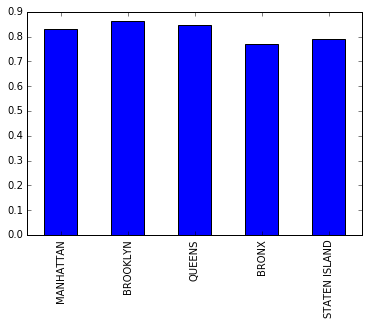

In [8]:
#create a df that counts all restaurants per borrough and elimnates missing info\n",
pre_lim = uniqueRestaurants[['BORO','DBA']].replace("Missing",NaN).dropna(how = "any")
all_rest_boro = pre_lim['BORO'].value_counts() #this is shows the total number of restaurants in each borrough"
all_rest_boro_df = DataFrame(all_rest_boro)
all_rest_boro_df.columns = ['Total in Borrough']
all_rest_boro_df['NonChain in Borrough'] = answerQ7["BORO"]
all_rest_boro_df['Percent'] = all_rest_boro_df['NonChain in Borrough']/all_rest_boro_df['Total in Borrough']
all_rest_boro_df['Percent'].plot(kind = "bar")

Q8 Plot the popularity of cuisines

Approach: Collect all cuisine descriptions, see the frequency of these cuisines by collecting the top 20, then make histogram of the top 20 cuisines 

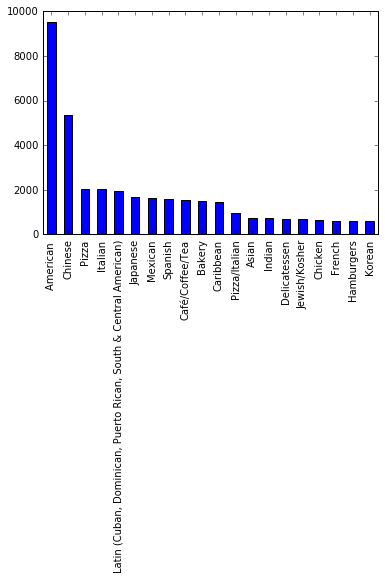

In [9]:
#get the cuisine types 
df['CUISINE DESCRIPTION']

#see frequency of cuisines 
vc = df['CUISINE DESCRIPTION'].value_counts()
vc[:20]

#plot histogram of top 20 cuisines 
top_20_vc = vc[:20]
top_20_vc.plot(kind='bar')

Q9: Plot the cuisines among restaurants which do not
get cited for violations.

Approach:  created a datframe with name s and cuisines.applied a mask that filter null values.Then counted the number of null violations codes for each

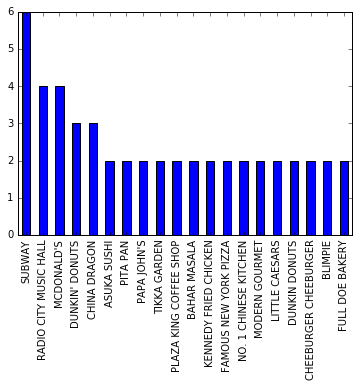

In [10]:
#make dataframe with resturant and cuisine description

restaurant_cuisine_df = df[['RESTAURANT', 'CUISINE DESCRIPTION']]

#print restaurant_cuisine_df


#find restaurants that are violators
#mask_restaurant_cuisine_nonviolators = df['VIOLATION CODE'].isnull()

#print mask_restaurant_cuisine_nonviolators

#combine mask with datafram
#mask = (restaurant_cuisine_df & mask_restaurant_cuisine_nonviolators)

mask = df['VIOLATION CODE'].isnull()

#apply the mask
mask_nonviolators = df[mask]

count_nonviolators = mask_nonviolators['DBA'].value_counts()



#plot histogram of top 20 cuisines 
top_20_nonviolators = count_nonviolators[:20]
top_20_nonviolators.plot(kind='bar')


Q10: What Cuisines tend to be the cleanest?

Approach: Found top 20 most frequent restaurants. Merged restaurants with non-violating restaurant table and total restaurant count tables. Created a ratio column and added it to the merged tbale, and it represented the total number of violations to total write-ups

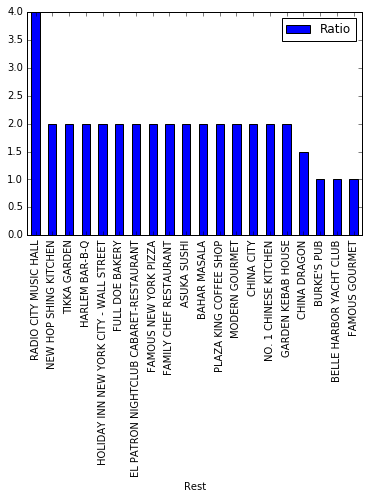

In [11]:
frequency_of_restaurants = df['DBA'].value_counts()


freq_rest = DataFrame(frequency_of_restaurants)



new_freq_rest = freq_rest.reset_index()
new_freq_rest.columns = ['Rest',"NumberCited"]

df_count_nonviolators = DataFrame(count_nonviolators)
new_nonviolators = df_count_nonviolators.reset_index()
new_nonviolators.columns = ['nonViolRest','nonViol']

totalNum = DataFrame(numberOfEach)
new_totalNum = totalNum.reset_index()
new_totalNum.columns = ['totalRest','total']


mask = (new_freq_rest >= 20)

freq_restaurants = new_freq_rest[mask]

#print freq_restaurants

merged_nonviolators = pd.merge(freq_restaurants,\
                              new_nonviolators, how='left',\
                     left_on='Rest' , right_on='nonViolRest',\
                     suffixes =['top20','freq'])


merged_nonviolators_total = pd.merge(merged_nonviolators,\
                              new_totalNum,\
                     left_on='Rest' , right_on='totalRest',\
                     suffixes =['merged','total'])



merged_nonviolators_total['Ratio'] = merged_nonviolators_total['nonViol']/merged_nonviolators_total['total']



sorted_df = merged_nonviolators_total.sort_values('Ratio', ascending=False)

new = sorted_df[['Rest','Ratio']]
#plot histogram of top 20 cuisines 
top = new[:20]

top.set_index('Rest',inplace=True)
top.plot(kind='bar')



Q11 What are the most common violations in each borough?

APPROACH: I first assigned a dummy column to each inspection for counting purpose.
Then I cleared out the data by substituting all missing BORO with NaN. Finally use pivot table to organize 
#the number of each type of violations by borough and listed the top violation with the function .idxmax().

In [12]:
df['count'] = 1 # dumpy value
    
vioBoro = df[['VIOLATION DESCRIPTION','BORO','count']]

#most = vioBoro['VIOLATION DESCRIPTION'].value_counts()
#print most[:5]

mask_missing = (vioBoro['BORO'] == 'Missing')
vioBoro.ix[mask_missing, 'BORO'] = np.nan # This sets the value to NaN

violations = pd.pivot_table(vioBoro,
                         index='VIOLATION DESCRIPTION',
                         columns='BORO',
                         values='count',
                         aggfunc=sum, #what do I do with the data if there is a collision
                         fill_value=0) #fill non-existed violation with 0.


topVio = violations.idxmax()


print topVio

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


C:\Users\albert\Anaconda2\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
#Q12 What are the most common violations per borough, 
#after normalizing for the relative abundance of each violation?

#Approach: First I created a frequency series for the total number of each type of frequence. 
#Then, I added a new column to the pivot table with the value of the frequency series. 
#Next, I transposed the pivot table and divided the number in each cell with the number from the 
#total number row(after transposition). Finally, I listed the top violation with the function .idxmax().

# Step 1: Get overall frequencies
df_dup = df.copy()
frequency = df_dup['VIOLATION DESCRIPTION'].dropna().value_counts()
violationFrequency = DataFrame(frequency)


#print violations['VIOLATION DESCRIPTION'].value_counts()
violations['total'] = violationFrequency


# Step 2: Create a new column that records total frquency
violations = (violations.T / violations.total).T
del violations['total']

norm_topVio = violations.idxmax()

print norm_topVio



BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object
